---
### Imports
---

In [6]:
from fastai.vision import *

---
### Make paths and prepare the download config
---

In [7]:
from os import path

pwd = 'lesson-2-urls'
classes = ['urus', 'cayenne']
classes = [path.join('.', pwd, cls) for cls in classes]

urus_fp = path.join('.', 'lesson-2-urls', 'url_lamborghini_urus.txt')
cayenne_fp = path.join('.', 'lesson-2-urls', 'url_porsche_cayenne.txt')
url_fp = [urus_fp, cayenne_fp]

download_config = list(zip(classes, url_fp))

print(download_config)

[('./lesson-2-urls/urus', './lesson-2-urls/url_lamborghini_urus.txt'), ('./lesson-2-urls/cayenne', './lesson-2-urls/url_porsche_cayenne.txt')]


---
### Download the images based on the config defined above (verify too)
---

In [8]:
doc(download_images)

In [9]:
for cfg in download_config:
    download_images(
        urls=cfg[1],
        dest=cfg[0]
    )

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [10]:
doc(verify_images)

In [11]:
data_fp = path.join('.', 'lesson-2-urls')
for image_folder in classes:
    print(image_folder)
    verify_images(path.join(data_fp, image_folder))

./lesson-2-urls/urus
./lesson-2-urls/cayenne


---
### Practice Lesson 1 and make a CNN out of it
---

In [12]:
doc(ImageDataBunch.from_folder)

In [13]:
data = ImageDataBunch.from_folder(
    path=data_fp,
    train='.',
    valid_pct=0.2,
    size=224
)

In [14]:
doc(ImageDataBunch.show_batch)

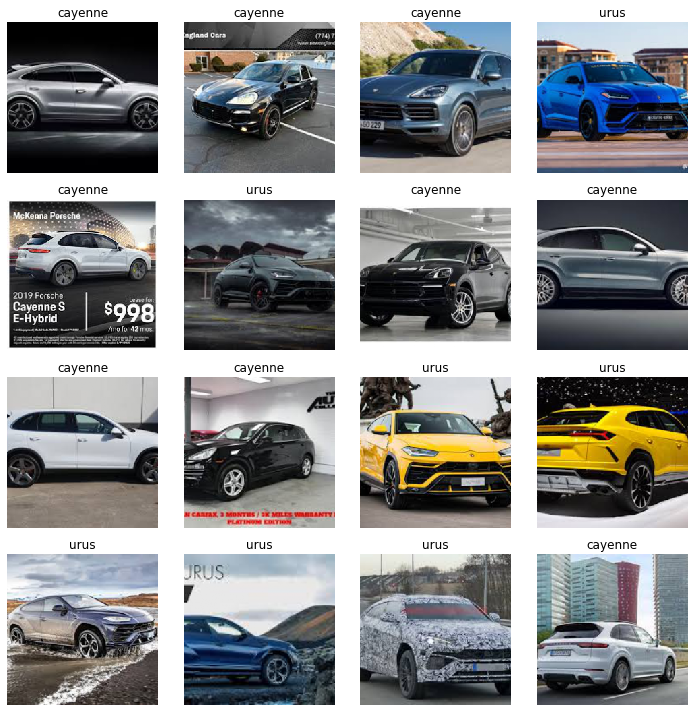

In [15]:
data.show_batch(
    rows=4,
    figsize=(10,10)
)

In [16]:
doc(cnn_learner)

In [17]:
learn = cnn_learner(
    data,
    models.resnet34,
    metrics=error_rate
)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [18]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.122809,0.528069,0.242188,00:03
1,0.693584,0.640080,0.171875,00:03
2,0.481667,0.596447,0.171875,00:03
3,0.365273,0.484160,0.109375,00:03
4,0.292702,0.460745,0.117188,00:03


In [19]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


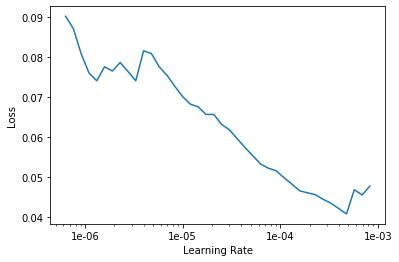

In [20]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-05, 1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.090466,0.423007,0.093750,00:03
1,0.068539,0.384564,0.093750,00:03


In [23]:
learn.save('stage-2')

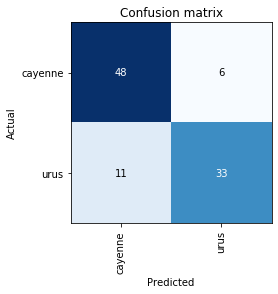

In [60]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [61]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)

In [62]:
ic = ImageCleaner(ds, idxs, Path('lesson-2-urls'))

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [63]:
import pandas as pd

df = pd.read_csv(path.join('lesson-2-urls', 'cleaned.csv'))

In [64]:
# doc(ImageDataBunch)
doc(ImageDataBunch.from_df)

In [65]:
data = ImageDataBunch.from_df('lesson-2-urls', df, ds_tfms=get_transforms(), size=224, valid_pct=0.2, bs=64)
# df.head()

In [66]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [73]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.076892,0.506127,0.893333,00:03


In [74]:
learn.save('stage-1')

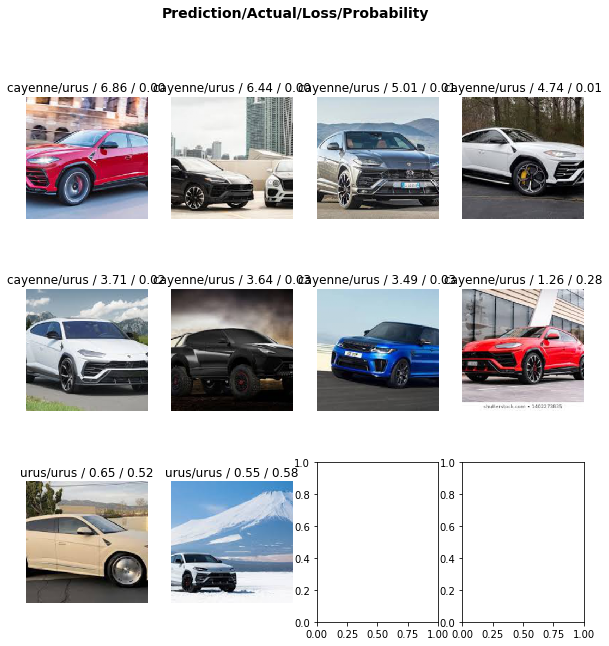

In [75]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(10, figsize=(10,10))

In [77]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


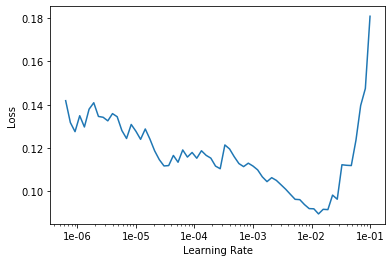

In [78]:
learn.recorder.plot()

In [80]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (302 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
urus,urus,urus,urus,urus
Path: lesson-2-urls;

Valid: LabelList (75 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
urus,cayenne,urus,urus,urus
Path: lesson-2-urls;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [79]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.176731,4.645429,0.520000,00:05
1,1.716355,3533.780518,0.413333,00:04
2,1.280385,3582.526611,0.413333,00:04
3,1.039560,163.961075,0.413333,00:04
